# Introduction

Today we'll dive deep into a dataset all about LEGO. From the dataset we can ask whole bunch of interesting questions about the history of the LEGO company, their product offering, and which LEGO set ultimately rules them all:

<ul type="square">
<li>What is the most enormous LEGO set ever created and how many parts did it have?</li>

<li>How did the LEGO company start out? In which year were the first LEGO sets released and how many sets did the company sell when it first launched?</li>

<li>Which LEGO theme has the most sets? Is it one of LEGO's own themes like Ninjago or a theme they licensed liked Harry Potter or Marvel Superheroes?</li>

<li>When did the LEGO company really expand its product offering? Can we spot a change in the company strategy based on how many themes and sets did it released year-on-year?</li>

<li>Did LEGO sets grow in size and complexity over time? Do older LEGO 
sets tend to have more or fewer parts than newer sets?</li>
</ul>

**Data Source**

[Rebrickable](https://rebrickable.com/downloads/) has compiled data on all the LEGO pieces in existence. I recommend you use download the .csv files provided in this lesson. 

![](assets/bricks.jpg)

# Import Statements

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Data Exploration

**Challenge**: How many different colours does the LEGO company produce? Read the colors.csv file in the data folder and find the total number of unique colours. Try using the [.nunique() method](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.nunique.html?highlight=nunique#pandas.DataFrame.nunique) to accomplish this.

In [2]:
colors = pd.read_csv('data/colors.csv')

In [3]:
colors.head()

,id,name,rgb,is_trans
0,-1,[Unknown],0033B2,f
1,0,Black,05131D,f
2,1,Blue,0055BF,f
3,2,Green,237841,f
4,3,Dark Turquoise,008F9B,f


In [4]:
colors['name'].nunique()

189

**Challenge**: Find the number of transparent colours where <code>is_trans == 't'</code> versus the number of opaque colours where <code>is_trans == 'f'</code>. See if you can accomplish this in two different ways.

In [5]:
colors.groupby('is_trans').count()

,id,name,rgb
is_trans,,,
f,151,151,151
t,38,38,38


In [6]:
colors['is_trans'].value_counts()

f    151
t     38
Name: is_trans, dtype: int64

### Understanding LEGO Themes vs. LEGO Sets

Walk into a LEGO store and you will see their products organised by theme. Their themes include Star Wars, Batman, Harry Potter and many more.

![](https://i.imgur.com/aKcwkSx.png)

A lego **set** is a particular box of LEGO or product. Therefore, a single theme typically has many different sets.

![](https://i.imgur.com/whB1olq.png)

The <code>sets.csv</code> data contains a list of sets over the years and the number of parts that each of these sets contained.

**Challenge**: Read the sets.csv data and take a look at the first and last couple of rows. 

In [7]:
sets = pd.read_csv('data/sets.csv')

In [8]:
sets.head()

,set_num,name,year,theme_id,num_parts
0,001-1,Gears,1965,1,43
1,0011-2,Town Mini-Figures,1979,67,12
2,0011-3,Castle 2 for 1 Bonus Offer,1987,199,0
3,0012-1,Space Mini-Figures,1979,143,12
4,0013-1,Space Mini-Figures,1979,143,12


In [9]:
sets.tail()

,set_num,name,year,theme_id,num_parts
18036,XWING-1,Mini X-Wing Fighter,2019,158,60
18037,XWING-2,X-Wing Trench Run,2019,158,52
18038,YODACHRON-1,Yoda Chronicles Promotional Set,2013,158,413
18039,YTERRIER-1,Yorkshire Terrier,2018,598,0
18040,ZX8000-1,ZX 8000 LEGO Sneaker,2020,501,0


**Challenge**: In which year were the first LEGO sets released and what were these sets called?

In [10]:
sets.loc[sets['year'] == sets['year'].min()]

,set_num,name,year,theme_id,num_parts
10745,700.1-1,Extra-Large Gift Set (ABB),1949,365,142
10758,700.2-1,Large Gift Set (ABB),1949,365,178
10763,700.3-1,Medium Gift Set (ABB),1949,365,142
10768,700.A-1,Small Brick Set (ABB),1949,371,24
10769,700.B-1,Small Doors and Windows Set (ABB),1949,371,12


**Challenge**: How many different sets did LEGO sell in their first year? How many types of LEGO products were on offer in the year the company started?

In [11]:
sets[sets['year'] == 1949]

,set_num,name,year,theme_id,num_parts
10745,700.1-1,Extra-Large Gift Set (ABB),1949,365,142
10758,700.2-1,Large Gift Set (ABB),1949,365,178
10763,700.3-1,Medium Gift Set (ABB),1949,365,142
10768,700.A-1,Small Brick Set (ABB),1949,371,24
10769,700.B-1,Small Doors and Windows Set (ABB),1949,371,12


**Challenge**: Find the top 5 LEGO sets with the most number of parts. 

In [12]:
sets.sort_values('num_parts', ascending=False).head()

,set_num,name,year,theme_id,num_parts
3787,31203-1,World Map,2021,709,11695
17132,BIGBOX-1,The Ultimate Battle for Chima,2015,571,9987
319,10276-1,Colosseum,2020,673,9036
12532,75192-1,UCS Millennium Falcon,2017,171,7541
11821,71043-1,Hogwarts Castle,2018,246,6020


**Challenge**: Use <code>.groupby()</code> and <code>.count()</code> to show the number of LEGO sets released year-on-year. How do the number of sets released in 1955 compare to the number of sets released in 2020?

In [13]:
sets_by_year = sets.groupby('year').count()
print(sets_by_year['set_num'].head())
sets_by_year['set_num'].tail()

year
1949     5
1950     6
1953     4
1954    14
1955    28
Name: set_num, dtype: int64


year
2017    848
2018    846
2019    885
2020    888
2021    803
Name: set_num, dtype: int64

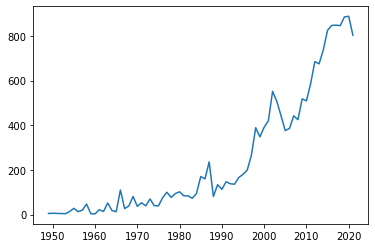

In [14]:
plt.plot(sets_by_year.index, sets_by_year['set_num'])

**Challenge**: Show the number of LEGO releases on a line chart using Matplotlib. <br>
<br>
Note that the .csv file is from late 2021, so to plot the full calendar years, you will have to exclude some data from your chart. Can you use the slicing techniques covered in Day 21 to avoid plotting the 2021 data? The same syntax will work on Pandas DataFrames. 

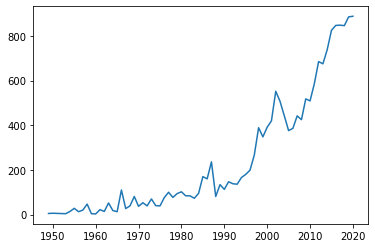

In [15]:
plt.plot(sets_by_year.index[:-1], sets_by_year['set_num'][:-1])

### Aggregate Data with the Python .agg() Function

Let's work out the number of different themes shipped by year. This means we have to count the number of unique theme_ids per calendar year.

In [16]:
themes_by_year = sets.groupby('year').agg({'theme_id': pd.Series.nunique})

In [17]:
themes_by_year.rename(columns = {'theme_id': 'nr_themes'}, inplace=True)
print(themes_by_year.head())
themes_by_year.tail()

      nr_themes
year           
1949          2
1950          1
1953          2
1954          2
1955          4


,nr_themes
year,
2017,88
2018,94
2019,79
2020,88
2021,71


**Challenge**: Plot the number of themes released by year on a line chart. Only include the full calendar years (i.e., exclude 2021). 

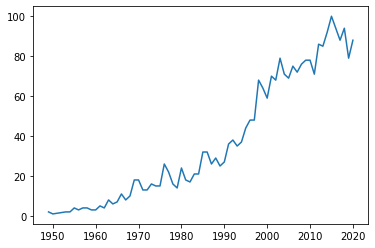

In [18]:
plt.plot(themes_by_year.index[:-1], themes_by_year['nr_themes'][:-1])

### Line Charts with Two Seperate Axes

Text(0, 0.5, 'Number of Themes')

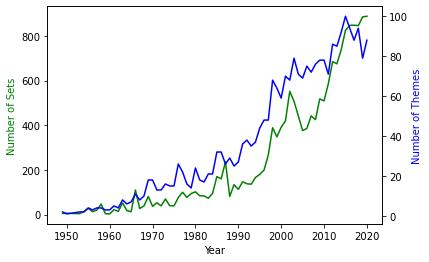

In [19]:
ax1 = plt.gca()
ax2 = ax1.twinx()

ax1.plot(sets_by_year.index[:-1], sets_by_year['set_num'][:-1], color='g')
ax2.plot(themes_by_year.index[:-1], themes_by_year['nr_themes'][:-1], color='b')

ax1.set_xlabel('Year')
ax1.set_ylabel('Number of Sets', color='green')
ax2.set_ylabel('Number of Themes', color='blue')

**Challenge**: Use the <code>.groupby()</code> and <code>.agg()</code> function together to figure out the average number of parts per set. How many parts did the average LEGO set released in 1954 compared to say, 2017?

In [20]:
parts_per_set = sets.groupby('year').agg({'num_parts': pd.Series.mean})
parts_per_set.head()

,num_parts
year,
1949,99.600000
1950,1.000000
1953,12.500000
1954,8.357143
1955,16.107143


In [21]:
parts_per_set.tail()

,num_parts
year,
2017,210.454009
2018,202.734043
2019,197.355932
2020,237.924550
2021,249.957659


### Scatter Plots in Matplotlib

**Challenge**: Has the size and complexity of LEGO sets increased over time based on the number of parts? Plot the average number of parts over time using a Matplotlib scatter plot. See if you can use the [scatter plot documentation](https://matplotlib.org/3.1.0/api/_as_gen/matplotlib.pyplot.scatter.html) before I show you the solution. Do you spot a trend in the chart? 

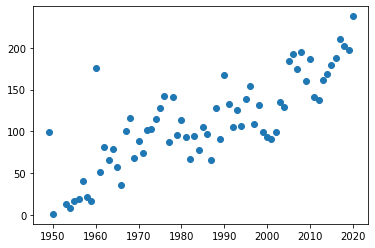

In [22]:
plt.scatter(parts_per_set.index[:-1], parts_per_set['num_parts'][:-1])

### Number of Sets per LEGO Theme

LEGO has licensed many hit franchises from Harry Potter to Marvel Super Heros to many others. But which theme has the largest number of individual sets? 

In [23]:
set_theme_count = sets['theme_id'].value_counts()
set_theme_count[:5]

501    1769
158     788
503     568
494     452
67      412
Name: theme_id, dtype: int64

![](https://i.imgur.com/Sg4lcjx.png)

### Database Schemas, Foreign Keys and Merging DataFrames

The themes.csv file has the actual theme names. The sets .csv has <code>theme_ids</code> which link to the <code>id</code> column in the themes.csv. 

**Challenge**: Explore the themes.csv. How is it structured? Search for the name 'Star Wars'. How many <code>id</code>s correspond to this name in the themes.csv? Now use these <code>id</code>s and find the corresponding the sets in the sets.csv (Hint: you'll need to look for matches in the <code>theme_id</code> column)

In [34]:
themes = pd.read_csv('data/themes.csv')
print(themes.head())
print(themes.tail())
themes.loc[themes['name'] == 'Star Wars']

   id            name  parent_id
0   1         Technic        NaN
1   2  Arctic Technic        1.0
2   3     Competition        1.0
3   4  Expert Builder        1.0
4   5           Model        1.0
      id                   name  parent_id
530  712  Series 21 Minifigures      535.0
531  713                 VIDIYO        NaN
532  714           Looney Tunes      535.0
533  715                 Marvel      535.0
534  716                Modulex        NaN


,id,name,parent_id
17,18,Star Wars,1.0
119,158,Star Wars,NaN
141,209,Star Wars,207.0
178,261,Star Wars,258.0


In [25]:
sets.loc[sets['theme_id'] == 18]

,set_num,name,year,theme_id,num_parts
9979,65081-1,R2-D2 / C-3PO Droid Collectors Set,2002,18,1
13495,8000-1,Pit Droid,2000,18,223
13502,8001-1,Battle Droid,2000,18,336
13513,8002-1,Destroyer Droid,2000,18,567
13525,8007-1,C-3PO,2001,18,339
13526,8008-1,Stormtrooper,2001,18,361
13527,8009-1,R2-D2,2002,18,239
13528,8010-1,Darth Vader,2002,18,388
13537,8011-1,Jango Fett,2002,18,425
13539,8012-1,Super Battle Droid,2002,18,378


In [26]:
sets.loc[sets['theme_id'] == 158]

,set_num,name,year,theme_id,num_parts
1871,20006-1,Clone Turbo Tank,2008,158,64
1882,20007-1,Republic Attack Cruiser,2009,158,84
1894,20009-1,AT-TE Walker,2009,158,94
1896,20010-1,Republic Gunship,2009,158,94
1902,20016-1,Imperial Shuttle,2010,158,70
...,...,...,...,...,...
18006,VP-4,Star Wars Co-Pack of 7101 7111 and 7171,2000,158,0
18009,VP-8,Star Wars Co-Pack of 7130 and 7150,2000,158,0
18036,XWING-1,Mini X-Wing Fighter,2019,158,60
18037,XWING-2,X-Wing Trench Run,2019,158,52


In [27]:
sets.loc[sets['theme_id'] == 209]

,set_num,name,year,theme_id,num_parts
12362,75023-1,Star Wars Advent Calendar 2013,2013,209,254
12395,75056-1,Star Wars Advent Calendar 2014,2014,209,275
12429,75097-1,Star Wars Advent Calendar 2015,2015,209,291
12480,75146-1,Star Wars Advent Calendar 2016,2016,209,282
12522,75184-1,Star Wars Advent Calendar 2017,2017,209,309
12555,75213-1,Star Wars Advent Calendar 2018,2018,209,307
12594,75245-1,Star Wars Advent Calendar 2019,2019,209,280
12630,75279-1,Star Wars Advent Calendar 2020,2020,209,311
12656,75307-1,Star Wars Advent Calendar 2021,2021,209,335
13463,7958-1,Star Wars Advent Calendar 2011,2011,209,267


In [28]:
sets.loc[sets['theme_id'] == 261]

,set_num,name,year,theme_id,num_parts
16682,9748-1,Droid Developer Kit,1999,261,658
16688,9754-1,Dark Side Developer Kit,2000,261,578


In [35]:
themes.loc[themes['name'] == 'Gear']

,id,name,parent_id
340,501,Gear,NaN


In [36]:
sets.loc[sets['theme_id'] == 501]

,set_num,name,year,theme_id,num_parts
794,11138-1,Bionicle Barraki Wallet,2008,501,0
952,12138-1,Bionicle Mahri Wallet,2008,501,0
1111,13078-1,"Sports Bag, Pink",2008,501,0
1114,13098-1,"Pencil Case, Pink (Horses)",2008,501,0
1119,13148-1,"Wheeled Carry-on Luggage, Pink (Horses)",2008,501,0
...,...,...,...,...,...
18017,WATCH-3,Watch System Voyager (UFO Space),1997,501,29
18028,WIIGAME-1,Bionicle Heroes - Wii,2007,501,0
18029,WIIGAME-2,Indiana Jones: The Original Adventures Video G...,2008,501,0
18033,WOODENELEPHANT-1,Vip Sweepstake Wooden Elephant,2021,501,0


### Merging (i.e., Combining) DataFrames based on a Key


In [29]:
set_theme_count = pd.DataFrame({'id': set_theme_count.index, 'set_count': set_theme_count.values})
set_theme_count.head()

,id,set_count
0,501,1769
1,158,788
2,503,568
3,494,452
4,67,412


In [30]:
merged_df = pd.merge(set_theme_count, themes, on='id')
merged_df[:3]

,id,set_count,name,parent_id
0,501,1769,Gear,NaN
1,158,788,Star Wars,NaN
2,503,568,Key Chain,501.0


<BarContainer object of 10 artists>

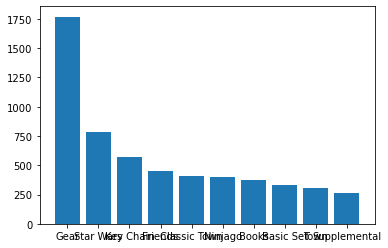

In [31]:
plt.bar(merged_df.name[:10], merged_df.set_count[:10])

<BarContainer object of 10 artists>

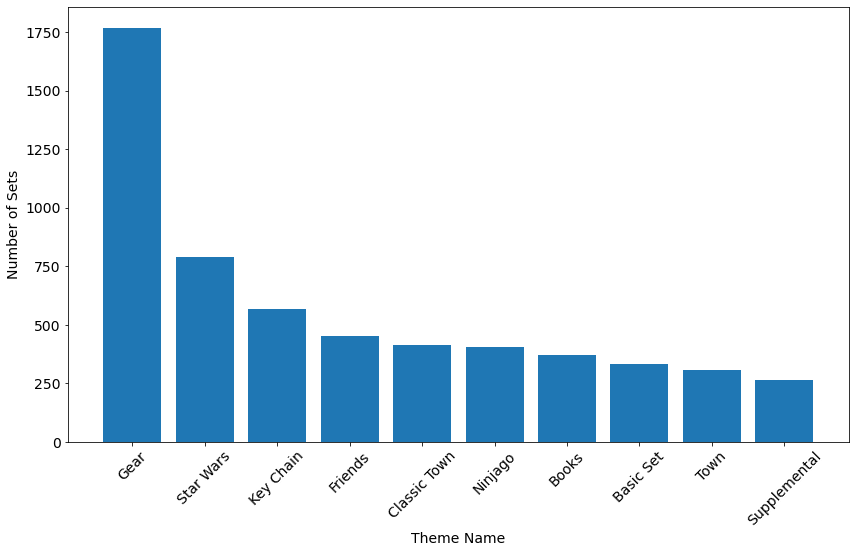

In [32]:
plt.figure(figsize=(14,8))
plt.xticks(fontsize=14, rotation=45)
plt.yticks(fontsize=14)
plt.ylabel('Number of Sets', fontsize=14)
plt.xlabel('Theme Name', fontsize=14)

plt.bar(merged_df.name[:10], merged_df.set_count[:10])